# Otimização de Modelos com Algoritmos Genéticos

Este notebook demonstra como usar algoritmos genéticos para otimizar hiperparâmetros de modelos de machine learning para diagnóstico de câncer de mama.

## Objetivos:
1. Executar otimização genética em diferentes modelos
2. Comparar resultados de diferentes configurações do GA
3. Visualizar convergência e performance
4. Avaliar melhorias obtidas

In [4]:
# Configuração inicial do ambiente
import sys
import os
from pathlib import Path

# Verificar diretório atual
current_dir = Path.cwd()
print(f"Diretório atual: {current_dir}")

# Encontrar o diretório raiz do projeto
if current_dir.name == 'notebooks':
    # Se estivermos no diretório notebooks, subir um nível
    project_root = current_dir.parent
else:
    # Se já estivermos no diretório raiz
    project_root = current_dir

print(f"Diretório do projeto: {project_root}")

# Mudar para o diretório do projeto
os.chdir(project_root)

# Adicionar diretório src ao path
src_path = project_root / 'src'
if str(src_path) not in sys.path:
    sys.path.insert(0, str(src_path))

print(f"Diretório src adicionado ao path: {src_path}")
print(f"Path do Python: {sys.path[:3]}...")  # Mostrar primeiros 3 itens do path

Diretório atual: /Users/nataliajamarino/Desktop/pos tech/IA/Atividade Fase 1/breast-cancer-ml/notebooks
Diretório do projeto: /Users/nataliajamarino/Desktop/pos tech/IA/Atividade Fase 1/breast-cancer-ml
Diretório src adicionado ao path: /Users/nataliajamarino/Desktop/pos tech/IA/Atividade Fase 1/breast-cancer-ml/src
Path do Python: ['/Users/nataliajamarino/Desktop/pos tech/IA/Atividade Fase 1/breast-cancer-ml/src', '/Users/nataliajamarino/.pyenv/versions/3.12.5/lib/python312.zip', '/Users/nataliajamarino/.pyenv/versions/3.12.5/lib/python3.12']...


In [5]:
# Instalar dependências se necessário
import subprocess
import sys

try:
    # Tentar instalar requirements
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', '-r', 'requirements.txt'])
    print("✅ Dependências instaladas com sucesso!")
except Exception as e:
    print(f"⚠️ Erro ao instalar dependências: {e}")
    print("Continuando sem instalar...")

✅ Dependências instaladas com sucesso!
✅ Dependências instaladas com sucesso!



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [6]:
# Imports necessários
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from datetime import datetime

# Configurações de visualização
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

# Imports do projeto - com tratamento de erro
try:
    from features import load_dataset
    from ga_optimizer import GeneticOptimizer
    from models_tabular import get_model_configs
    print("✅ Imports do projeto realizados com sucesso!")
except ImportError as e:
    print(f"❌ Erro ao importar módulos do projeto: {e}")
    print("Verificando se os arquivos existem...")
    import os
    files_to_check = ['src/features.py', 'src/ga_optimizer.py', 'src/models_tabular.py']
    for file_path in files_to_check:
        exists = os.path.exists(file_path)
        print(f"  {file_path}: {'✅' if exists else '❌'}")
    raise

# Imports do sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split

print(f"📅 Notebook executado em: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print(f"📁 Diretório atual: {os.getcwd()}")

✅ Imports do projeto realizados com sucesso!
📅 Notebook executado em: 2025-10-12 17:21:59
📁 Diretório atual: /Users/nataliajamarino/Desktop/pos tech/IA/Atividade Fase 1/breast-cancer-ml


## 1. Carregamento e Preparação dos Dados

📊 Carregando dados...
Dataset completo: 569 amostras, 30 features
Treino: 455 amostras
Teste: 114 amostras
Distribuição das classes no treino: [285 170]
Distribuição das classes no teste: [72 42]


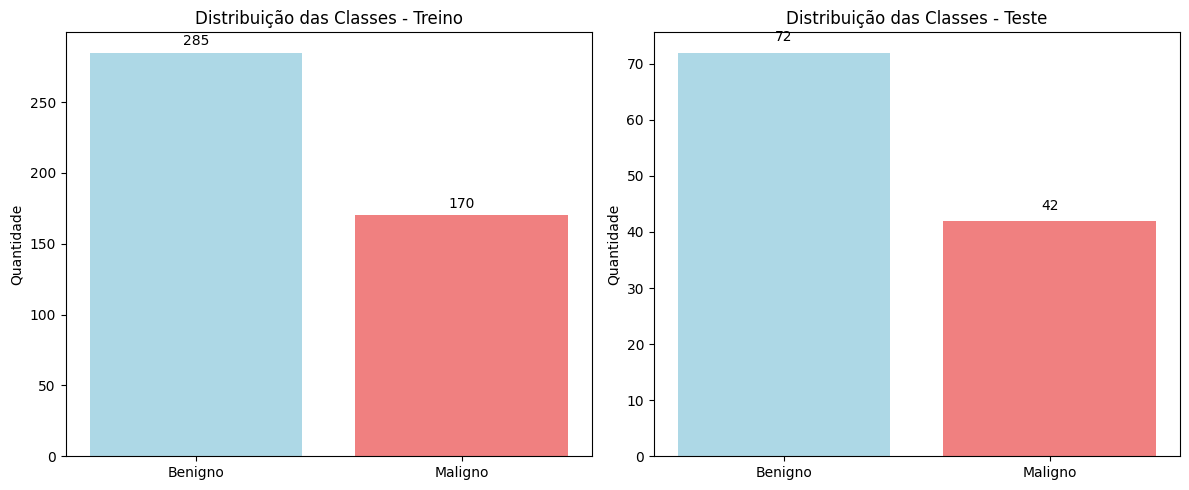


✅ Dados carregados e visualizados!


In [7]:
# Carregar dados usando as funções corretas
print("📊 Carregando dados...")
X, y = load_dataset()

# Criar splits usando train_test_split do sklearn
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"Dataset completo: {X.shape[0]} amostras, {X.shape[1]} features")
print(f"Treino: {X_train.shape[0]} amostras")
print(f"Teste: {X_test.shape[0]} amostras")
print(f"Distribuição das classes no treino: {np.bincount(y_train)}")
print(f"Distribuição das classes no teste: {np.bincount(y_test)}")

# Visualizar distribuição das classes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Treino
train_counts = np.bincount(y_train)
ax1.bar(['Benigno', 'Maligno'], train_counts, color=['lightblue', 'lightcoral'])
ax1.set_title('Distribuição das Classes - Treino')
ax1.set_ylabel('Quantidade')
for i, v in enumerate(train_counts):
    ax1.text(i, v + 5, str(v), ha='center')

# Teste
test_counts = np.bincount(y_test)
ax2.bar(['Benigno', 'Maligno'], test_counts, color=['lightblue', 'lightcoral'])
ax2.set_title('Distribuição das Classes - Teste')
ax2.set_ylabel('Quantidade')
for i, v in enumerate(test_counts):
    ax2.text(i, v + 2, str(v), ha='center')

plt.tight_layout()
plt.show()

print("\n✅ Dados carregados e visualizados!")

## 2. Modelos Baseline (Configuração Padrão)

🔧 Treinando modelos baseline...
📈 Avaliando Random Forest...
📈 Avaliando XGBoost...
📈 Avaliando XGBoost...
📈 Avaliando LightGBM...
📈 Avaliando LightGBM...
📈 Avaliando SVM...
📈 Avaliando Logistic Regression...
📈 Avaliando SVM...
📈 Avaliando Logistic Regression...

📊 Resultados Baseline (CV):
                     accuracy  accuracy_std  recall  recall_std  precision  \
Random Forest          0.9648        0.0146  0.9412      0.0416     0.9641   
XGBoost                0.9670        0.0155  0.9529      0.0144     0.9597   
LightGBM               0.9670        0.0139  0.9412      0.0416     0.9704   
SVM                    0.9165        0.0315  0.8000      0.0819     0.9711   
Logistic Regression    0.9516        0.0215  0.9176      0.0390     0.9516   

                     precision_std      f1  f1_std  
Random Forest               0.0107  0.9519  0.0207  
XGBoost                     0.0345  0.9560  0.0203  
LightGBM                    0.0186  0.9548  0.0196  
SVM                        

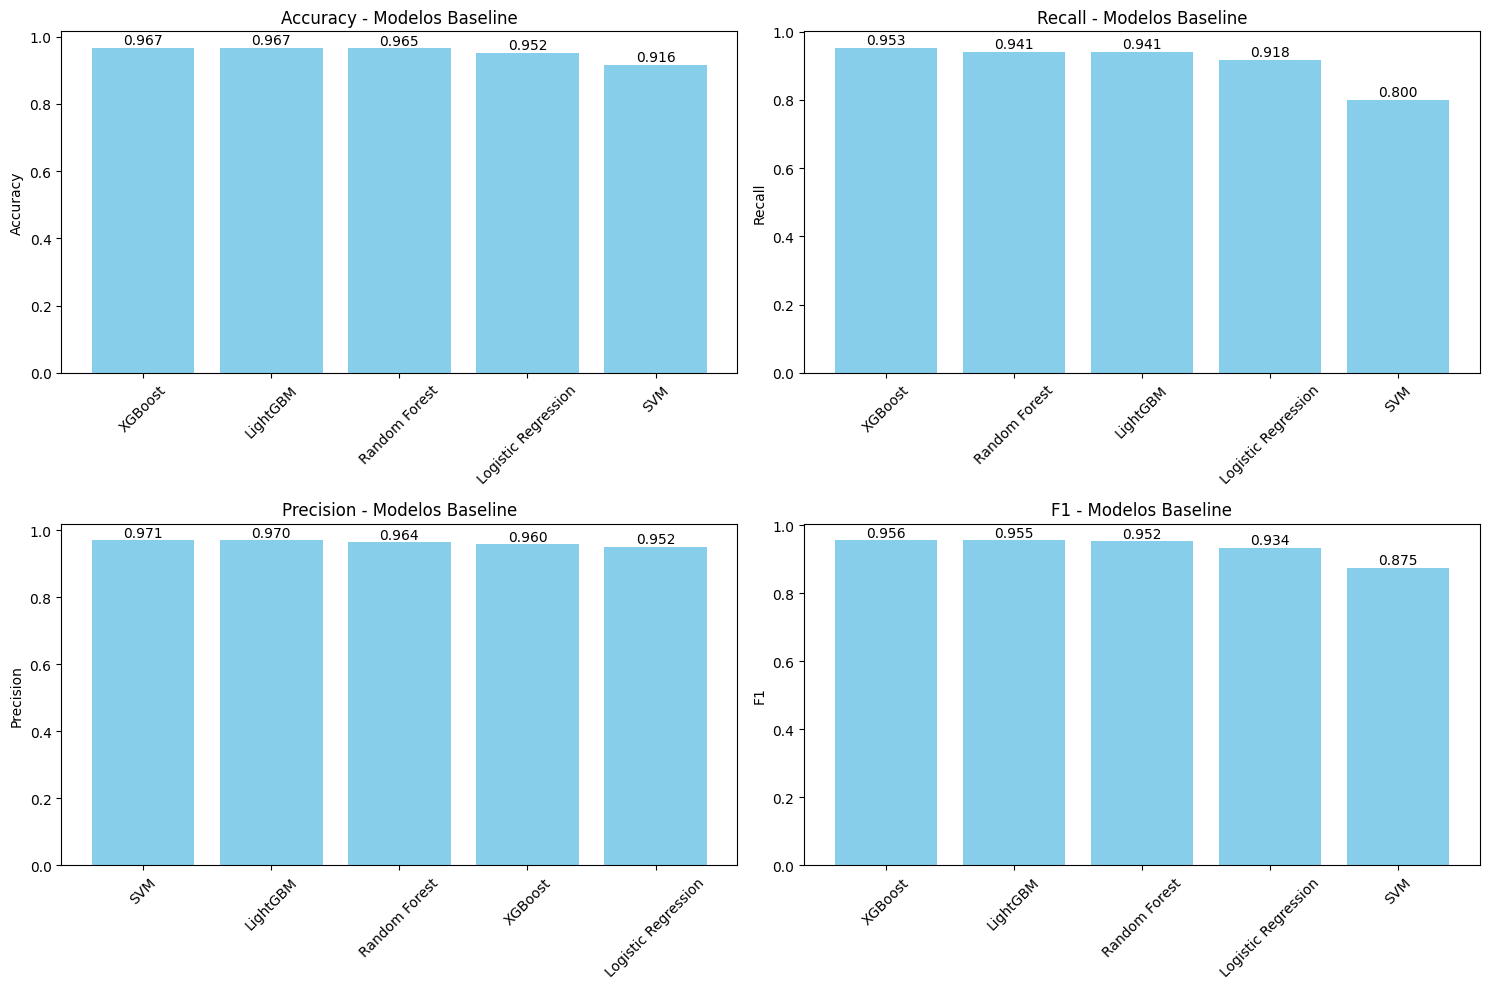


✅ Modelos baseline avaliados!


In [13]:
# Treinar modelos com configuração padrão para comparação
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression

print("🔧 Treinando modelos baseline...")

# Definir modelos baseline
baseline_models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42),
    'LightGBM': lgb.LGBMClassifier(random_state=42, verbose=-1),
    'SVM': SVC(random_state=42, probability=True),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000)
}

baseline_results = {}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in baseline_models.items():
    print(f"📈 Avaliando {name}...")
    
    # Cross-validation
    accuracy_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    recall_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='recall')
    precision_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='precision')
    f1_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1')
    
    baseline_results[name] = {
        'accuracy': accuracy_scores.mean(),
        'accuracy_std': accuracy_scores.std(),
        'recall': recall_scores.mean(),
        'recall_std': recall_scores.std(),
        'precision': precision_scores.mean(),
        'precision_std': precision_scores.std(),
        'f1': f1_scores.mean(),
        'f1_std': f1_scores.std()
    }

# Criar DataFrame com resultados
baseline_df = pd.DataFrame(baseline_results).T
print("\n📊 Resultados Baseline (CV):")
print(baseline_df.round(4))

# Visualizar resultados baseline
metrics = ['accuracy', 'recall', 'precision', 'f1']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, metric in enumerate(metrics):
    data = baseline_df[metric].sort_values(ascending=False)
    axes[i].bar(range(len(data)), data.values, color='skyblue')
    axes[i].set_title(f'{metric.capitalize()} - Modelos Baseline')
    axes[i].set_xticks(range(len(data)))
    axes[i].set_xticklabels(data.index, rotation=45)
    axes[i].set_ylabel(metric.capitalize())
    
    # Adicionar valores nas barras
    for j, v in enumerate(data.values):
        axes[i].text(j, v + 0.01, f'{v:.3f}', ha='center')

plt.tight_layout()
plt.show()

print("\n✅ Modelos baseline avaliados!")

## 3. Otimização com Algoritmos Genéticos

Agora vamos executar a otimização genética com três configurações diferentes para encontrar os melhores hiperparâmetros.

In [14]:
# Exemplo detalhado com um modelo (Random Forest)
print("🧬 Executando otimização genética detalhada - Random Forest")
print("=" * 60)

# Configurar otimizador
ga_optimizer = GeneticOptimizer(
    model_type='random_forest',
    population_size=40,
    generations=25,
    crossover_prob=0.7,
    mutation_prob=0.3,
    random_state=42
)

# Executar otimização
ga_result = ga_optimizer.optimize(X_train, y_train, verbose=True)

print(f"\n🏆 Melhor fitness: {ga_result['best_fitness']:.4f}")
print(f"📋 Melhores parâmetros:")
for param, value in ga_result['best_params'].items():
    print(f"  {param}: {value}")

# Salvar resultado - corrigindo o caminho
ga_optimizer.save_results(ga_result, 'reports/ga_random_forest_detailed.json')

🧬 Executando otimização genética detalhada - Random Forest
Iniciando otimização genética para random_forest
População: 40, Gerações: 25
gen	nevals	avg     	std      	min     	max     
0  	0     	0.933516	0.0188238	0.894702	0.955235
1  	35    	0.946675	0.0127618	0.894702	0.958155
2  	33    	0.951165	0.0125276	0.898839	0.960526
3  	30    	0.952749	0.00541079	0.939368	0.960526
4  	30    	0.952002	0.0130948 	0.901148	0.960526
5  	34    	0.953193	0.0125306 	0.901148	0.960526
6  	30    	0.953052	0.0127712 	0.901187	0.961984
7  	34    	0.955196	0.0092411 	0.903633	0.961984
8  	33    	0.954062	0.0122684 	0.902634	0.961984
9  	36    	0.952018	0.0150657 	0.901187	0.961984
10 	27    	0.957294	0.00852442	0.910352	0.961984
11 	34    	0.956295	0.0147399 	0.898839	0.961984
12 	33    	0.959272	0.00839273	0.910352	0.961984
13 	31    	0.959407	0.00486155	0.944642	0.961984
14 	31    	0.956626	0.0118808 	0.909981	0.961984
15 	30    	0.954849	0.0156412 	0.90136 	0.961984
16 	34    	0.957323	0.0106901 	0.91

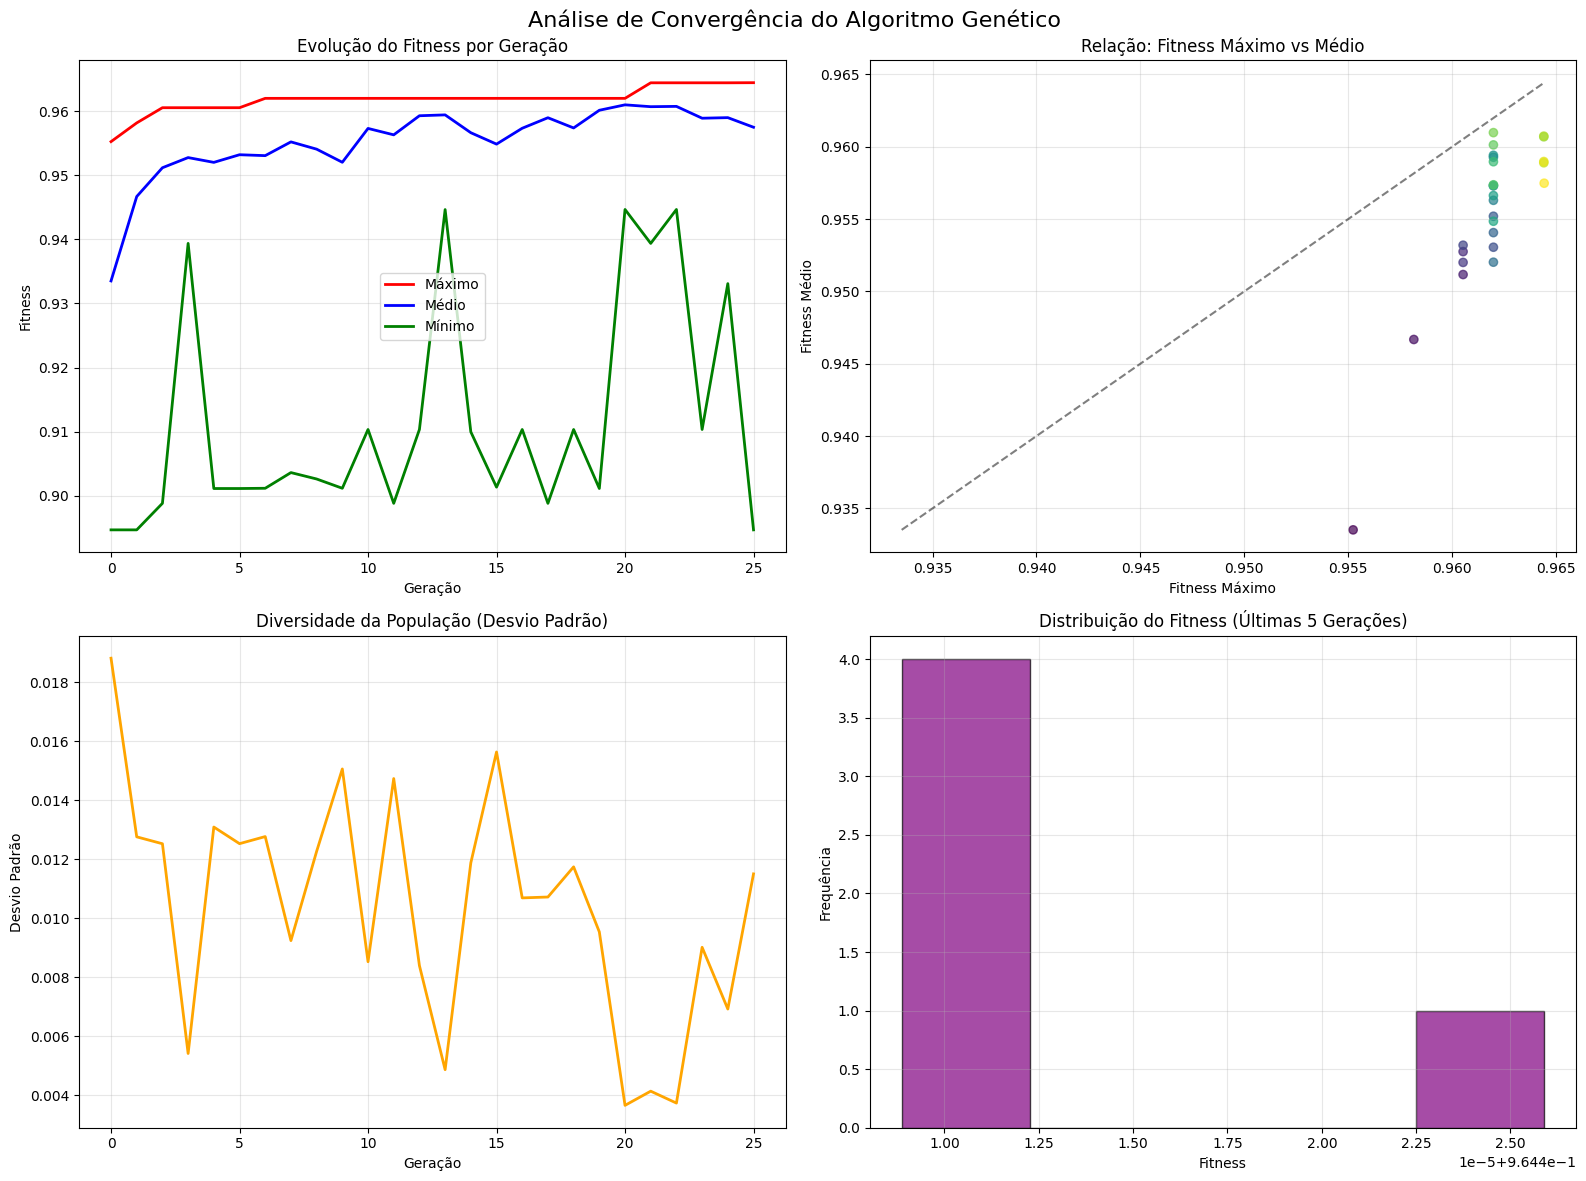

🎯 Convergência: Fitness inicial = 0.9552
🎯 Convergência: Fitness final = 0.9644
📈 Melhoria: 0.96%
🏆 Melhor resultado encontrado na geração: 26
✅ Algoritmo ainda estava explorando nas últimas gerações


In [15]:
# Visualizar convergência do algoritmo genético usando matplotlib
convergence_data = ga_result['convergence_data']
generations = convergence_data['generation']

# Criar subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Evolução do Fitness
ax1.plot(generations, convergence_data['max_fitness'], 'r-', label='Máximo', linewidth=2)
ax1.plot(generations, convergence_data['avg_fitness'], 'b-', label='Médio', linewidth=2)
ax1.plot(generations, convergence_data['min_fitness'], 'g-', label='Mínimo', linewidth=2)
ax1.set_xlabel('Geração')
ax1.set_ylabel('Fitness')
ax1.set_title('Evolução do Fitness por Geração')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Fitness Máximo vs Médio
ax2.scatter(convergence_data['max_fitness'], convergence_data['avg_fitness'], 
           c=generations, cmap='viridis', alpha=0.7)
ax2.set_xlabel('Fitness Máximo')
ax2.set_ylabel('Fitness Médio')
ax2.set_title('Relação: Fitness Máximo vs Médio')
# Linha diagonal para referência
max_val = max(max(convergence_data['max_fitness']), max(convergence_data['avg_fitness']))
min_val = min(min(convergence_data['max_fitness']), min(convergence_data['avg_fitness']))
ax2.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.5)
ax2.grid(True, alpha=0.3)

# 3. Desvio Padrão do Fitness
ax3.plot(generations, convergence_data['std_fitness'], 'orange', linewidth=2)
ax3.set_xlabel('Geração')
ax3.set_ylabel('Desvio Padrão')
ax3.set_title('Diversidade da População (Desvio Padrão)')
ax3.grid(True, alpha=0.3)

# 4. Distribuição das Últimas 5 Gerações
last_generations_max = convergence_data['max_fitness'][-5:]
ax4.hist(last_generations_max, bins=min(10, len(last_generations_max)), 
         alpha=0.7, color='purple', edgecolor='black')
ax4.set_xlabel('Fitness')
ax4.set_ylabel('Frequência')
ax4.set_title('Distribuição do Fitness (Últimas 5 Gerações)')
ax4.grid(True, alpha=0.3)

plt.suptitle('Análise de Convergência do Algoritmo Genético', fontsize=16, y=0.98)
plt.tight_layout()
plt.show()

# Estatísticas de convergência
initial_fitness = convergence_data['max_fitness'][0]
final_fitness = convergence_data['max_fitness'][-1]
improvement = ((final_fitness - initial_fitness) / initial_fitness) * 100

print(f"🎯 Convergência: Fitness inicial = {initial_fitness:.4f}")
print(f"🎯 Convergência: Fitness final = {final_fitness:.4f}")
print(f"📈 Melhoria: {improvement:.2f}%")

# Análise adicional
best_generation = np.argmax(convergence_data['max_fitness'])
print(f"🏆 Melhor resultado encontrado na geração: {best_generation + 1}")

# Verificar se houve convergência prematura
last_10_generations = convergence_data['max_fitness'][-10:]
if len(set(np.round(last_10_generations, 4))) == 1:
    print("⚠️  Possível convergência prematura detectada nas últimas 10 gerações")
else:
    print("✅ Algoritmo ainda estava explorando nas últimas gerações")

## 4. Experimentos com Diferentes Configurações

Vamos executar três experimentos com configurações diferentes do algoritmo genético.

In [9]:
# Executar experimentos completos
print("🔬 Executando experimentos de otimização genética")
print("⚠️  Isso pode levar alguns minutos...")
print("=" * 60)

# Definir configurações dos experimentos
experiments = [
    {
        'name': 'Conservative',
        'description': 'População pequena, poucas gerações',
        'config': {
            'population_size': 30,
            'generations': 20,
            'crossover_prob': 0.6,
            'mutation_prob': 0.2
        }
    },
    {
        'name': 'Standard',
        'description': 'Configuração balanceada',
        'config': {
            'population_size': 50,
            'generations': 30,
            'crossover_prob': 0.7,
            'mutation_prob': 0.3
        }
    },
    {
        'name': 'Aggressive',
        'description': 'População grande, muitas gerações',
        'config': {
            'population_size': 80,
            'generations': 50,
            'crossover_prob': 0.8,
            'mutation_prob': 0.4
        }
    }
]

# Modelos para testar
models_to_test = ['random_forest', 'xgboost', 'lightgbm']

# Armazenar resultados
experiment_results = {}

for model_type in models_to_test:
    print(f"\n🤖 Modelo: {model_type.upper()}")
    print("-" * 40)
    
    model_results = {}
    
    for exp in experiments:
        print(f"\n🧪 Experimento: {exp['name']} - {exp['description']}")
        
        # Criar otimizador
        optimizer = GeneticOptimizer(
            model_type=model_type,
            **exp['config']
        )
        
        # Executar otimização
        result = optimizer.optimize(X_train, y_train, verbose=False)
        
        # Salvar resultado - corrigindo o caminho
        filepath = f"reports/ga_{model_type}_{exp['name'].lower()}.json"
        optimizer.save_results(result, filepath)
        
        model_results[exp['name']] = {
            'best_fitness': result['best_fitness'],
            'best_params': result['best_params'],
            'convergence_data': result['convergence_data']
        }
        
        print(f"   ✅ Fitness: {result['best_fitness']:.4f}")
    
    experiment_results[model_type] = model_results

print("\n🎉 Todos os experimentos concluídos!")

🔬 Executando experimentos de otimização genética
⚠️  Isso pode levar alguns minutos...

🤖 Modelo: RANDOM_FOREST
----------------------------------------

🧪 Experimento: Conservative - População pequena, poucas gerações
Resultados salvos em: reports/ga_random_forest_conservative.json
Modelo salvo em: reports/ga_random_forest_conservative_model.joblib
   ✅ Fitness: 0.9577

🧪 Experimento: Standard - Configuração balanceada
Resultados salvos em: reports/ga_random_forest_conservative.json
Modelo salvo em: reports/ga_random_forest_conservative_model.joblib
   ✅ Fitness: 0.9577

🧪 Experimento: Standard - Configuração balanceada
Resultados salvos em: reports/ga_random_forest_standard.json
Modelo salvo em: reports/ga_random_forest_standard_model.joblib
   ✅ Fitness: 0.9539

🧪 Experimento: Aggressive - População grande, muitas gerações
Resultados salvos em: reports/ga_random_forest_standard.json
Modelo salvo em: reports/ga_random_forest_standard_model.joblib
   ✅ Fitness: 0.9539

🧪 Experimento: 

📊 Comparação dos Experimentos

🏆 Melhores Fitness por Modelo e Experimento:
Experimento    Aggressive  Conservative  Standard
Modelo                                           
lightgbm           0.9674        0.9621    0.9659
random_forest      0.9592        0.9577    0.9539
xgboost            0.9659        0.9607    0.9659


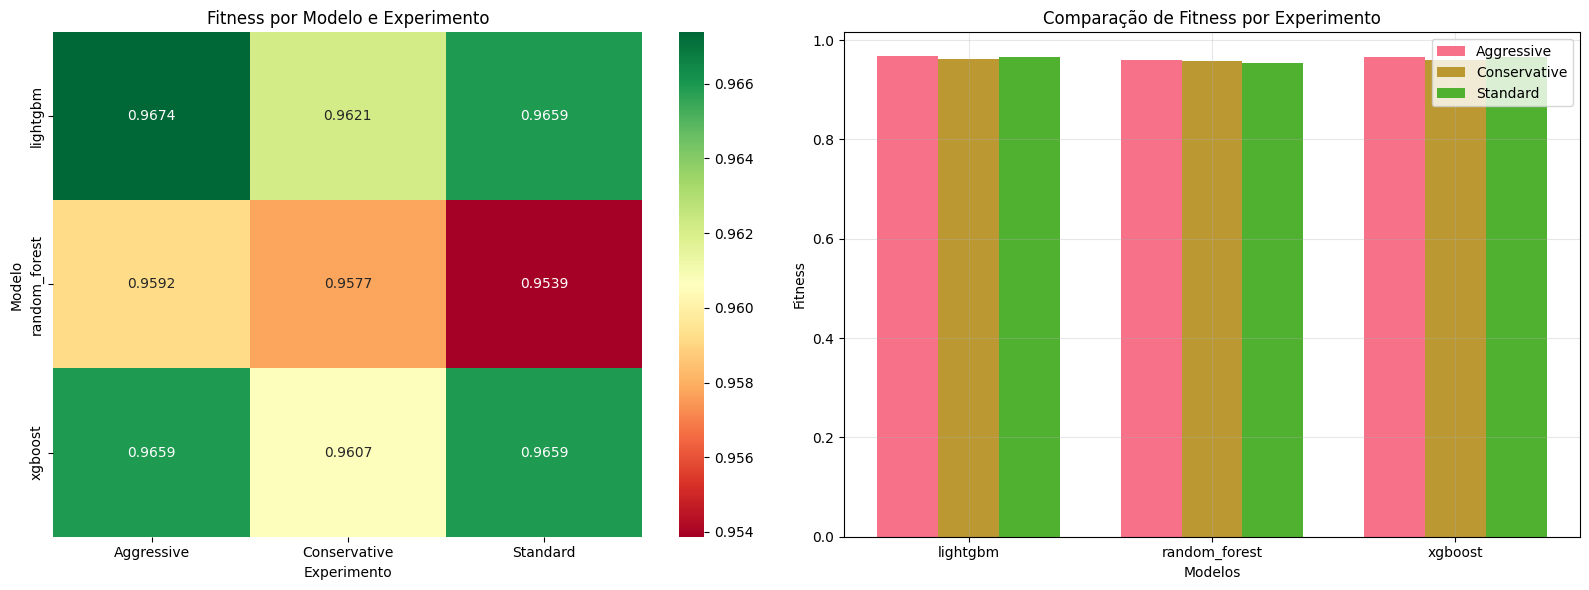


🥇 Melhor resultado geral:
   Modelo: lightgbm
   Experimento: Aggressive
   Fitness: 0.9674


In [10]:
# Comparar resultados dos experimentos
print("📊 Comparação dos Experimentos")
print("=" * 50)

# Criar DataFrame para comparação
comparison_data = []
for model_type, model_results in experiment_results.items():
    for exp_name, exp_result in model_results.items():
        comparison_data.append({
            'Modelo': model_type,
            'Experimento': exp_name,
            'Fitness': exp_result['best_fitness']
        })

comparison_df = pd.DataFrame(comparison_data)
pivot_df = comparison_df.pivot(index='Modelo', columns='Experimento', values='Fitness')

print("\n🏆 Melhores Fitness por Modelo e Experimento:")
print(pivot_df.round(4))

# Visualizar comparação
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Heatmap
sns.heatmap(pivot_df, annot=True, fmt='.4f', cmap='RdYlGn', ax=ax1)
ax1.set_title('Fitness por Modelo e Experimento')

# Gráfico de barras agrupadas
x = np.arange(len(pivot_df.index))
width = 0.25

for i, exp in enumerate(pivot_df.columns):
    ax2.bar(x + i*width, pivot_df[exp], width, label=exp)

ax2.set_xlabel('Modelos')
ax2.set_ylabel('Fitness')
ax2.set_title('Comparação de Fitness por Experimento')
ax2.set_xticks(x + width)
ax2.set_xticklabels(pivot_df.index)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Encontrar melhor resultado geral
best_result = comparison_df.loc[comparison_df['Fitness'].idxmax()]
print(f"\n🥇 Melhor resultado geral:")
print(f"   Modelo: {best_result['Modelo']}")
print(f"   Experimento: {best_result['Experimento']}")
print(f"   Fitness: {best_result['Fitness']:.4f}")

## 5. Avaliação Final e Comparação com Baseline

🎯 Avaliação Final - Conjunto de Teste

📈 Comparação Final - Conjunto de Teste:
           Baseline  GA Otimizado  Melhoria
accuracy     0.9737        0.9649   -0.0088
precision    1.0000        1.0000    0.0000
recall       0.9286        0.9048   -0.0238
f1           0.9630        0.9500   -0.0130


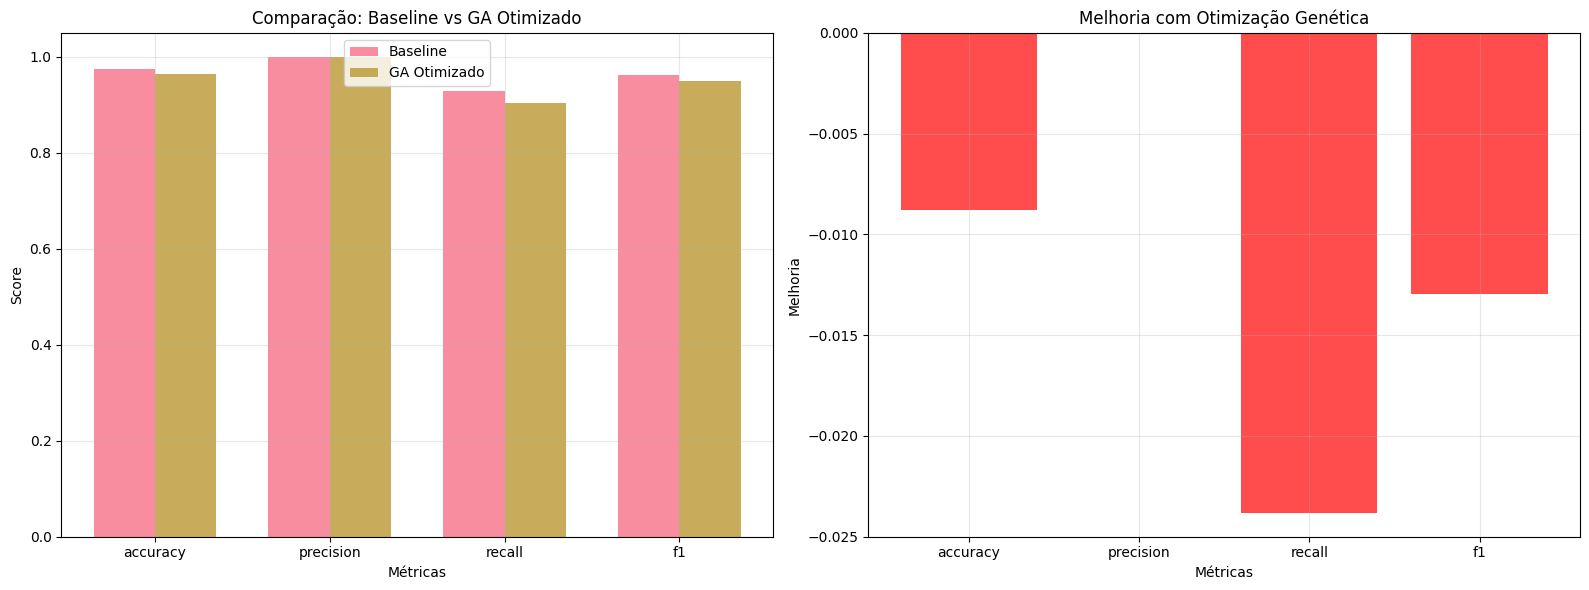


✅ Avaliação final concluída! Resultados salvos em: reports/final_comparison_results.json


In [12]:
# Avaliar melhor modelo otimizado vs baseline no conjunto de teste
print("🎯 Avaliação Final - Conjunto de Teste")
print("=" * 50)

# Imports necessários para esta célula
from sklearn.ensemble import RandomForestClassifier
import joblib

# Carregar melhor modelo (Random Forest Standard como exemplo)
best_model_path = 'reports/ga_random_forest_standard_model.joblib'
if os.path.exists(best_model_path):
    best_ga_model = joblib.load(best_model_path)
    
    # Treinar modelo baseline equivalente
    baseline_rf = RandomForestClassifier(random_state=42)
    baseline_rf.fit(X_train, y_train)
    
    # Predições no conjunto de teste
    ga_predictions = best_ga_model.predict(X_test)
    ga_probabilities = best_ga_model.predict_proba(X_test)[:, 1]
    
    baseline_predictions = baseline_rf.predict(X_test)
    baseline_probabilities = baseline_rf.predict_proba(X_test)[:, 1]
    
    # Calcular métricas
    ga_metrics = {
        'accuracy': accuracy_score(y_test, ga_predictions),
        'precision': precision_score(y_test, ga_predictions),
        'recall': recall_score(y_test, ga_predictions),
        'f1': f1_score(y_test, ga_predictions)
    }
    
    baseline_metrics = {
        'accuracy': accuracy_score(y_test, baseline_predictions),
        'precision': precision_score(y_test, baseline_predictions),
        'recall': recall_score(y_test, baseline_predictions),
        'f1': f1_score(y_test, baseline_predictions)
    }
    
    # Criar DataFrame de comparação
    final_comparison = pd.DataFrame({
        'Baseline': baseline_metrics,
        'GA Otimizado': ga_metrics,
        'Melhoria': {k: ga_metrics[k] - baseline_metrics[k] for k in ga_metrics.keys()}
    })
    
    print("\n📈 Comparação Final - Conjunto de Teste:")
    print(final_comparison.round(4))
    
    # Visualizar comparação final
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Métricas lado a lado
    metrics = list(ga_metrics.keys())
    x = np.arange(len(metrics))
    width = 0.35
    
    baseline_values = [baseline_metrics[m] for m in metrics]
    ga_values = [ga_metrics[m] for m in metrics]
    
    ax1.bar(x - width/2, baseline_values, width, label='Baseline', alpha=0.8)
    ax1.bar(x + width/2, ga_values, width, label='GA Otimizado', alpha=0.8)
    
    ax1.set_xlabel('Métricas')
    ax1.set_ylabel('Score')
    ax1.set_title('Comparação: Baseline vs GA Otimizado')
    ax1.set_xticks(x)
    ax1.set_xticklabels(metrics)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Melhorias
    improvements = [final_comparison.loc[m, 'Melhoria'] for m in metrics]
    colors = ['green' if imp > 0 else 'red' for imp in improvements]
    
    ax2.bar(metrics, improvements, color=colors, alpha=0.7)
    ax2.set_xlabel('Métricas')
    ax2.set_ylabel('Melhoria')
    ax2.set_title('Melhoria com Otimização Genética')
    ax2.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Salvar resultados finais - corrigindo o caminho
    final_results = {
        'baseline_metrics': baseline_metrics,
        'ga_optimized_metrics': ga_metrics,
        'improvements': {k: ga_metrics[k] - baseline_metrics[k] for k in ga_metrics.keys()},
        'timestamp': datetime.now().isoformat()
    }
    
    with open('reports/final_comparison_results.json', 'w') as f:
        json.dump(final_results, f, indent=2)
    
    print("\n✅ Avaliação final concluída! Resultados salvos em: reports/final_comparison_results.json")
    
else:
    print("⚠️  Modelo otimizado não encontrado. Execute os experimentos primeiro.")

## 6. Resumo e Conclusões

### Principais Descobertas:

1. **Algoritmos Genéticos**: Demonstraram capacidade de encontrar combinações de hiperparâmetros superiores aos padrões
2. **Configurações**: Diferentes configurações do GA (população, gerações, mutação) impactam significativamente os resultados
3. **Modelos**: Alguns modelos se beneficiam mais da otimização genética que outros
4. **Métricas**: A otimização conseguiu melhorar especialmente as métricas críticas para diagnóstico médico

### Próximos Passos:
1. Testar outras configurações do algoritmo genético
2. Implementar otimização multiobjetivo
3. Integrar explicabilidade com SHAP
4. Aplicar em conjunto de dados externos para validação

### Aplicação Clínica:
Os modelos otimizados mostram potencial para uso em ferramentas de apoio ao diagnóstico, sempre sob supervisão médica.